# Loading and visualizing my Sound Recording

In [1]:
#Importing necessary libraries
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import spectrogram

In [2]:
def calculate_snr(clean_signal, noise_signal):
    
    if len(clean_signal) != len(noise_signal):
        raise ValueError("Not same length.")

    signal_power = np.mean(clean_signal**2)

    noise_power = np.mean(noise_signal**2)

    snr_db = 10 * np.log10(signal_power / noise_power)
    return snr_db

In [3]:
# Loading speech signal (My own recording), Sampling frequency, and calculating the time vector
speech, fs = sf.read('Clean_speech.wav')
t = np.arange(len(speech)) / fs # Dividing by fs to get actual seconds


# Printing out details about the recorded Waveform
print("Dimension:", speech.shape)
print("Fs (Sampling frequency in Hz):", fs)
print("Length (s):", len(speech) / fs)

# In case the signal is in stereo, we take the mean out of the two channels to turn it into mono
if speech.ndim > 1:
    speech = speech.mean(axis = 1) 

# Playing the signal
sd.play(speech,fs)

Dimension: (599040,)
Fs (Sampling frequency in Hz): 48000
Length (s): 12.48


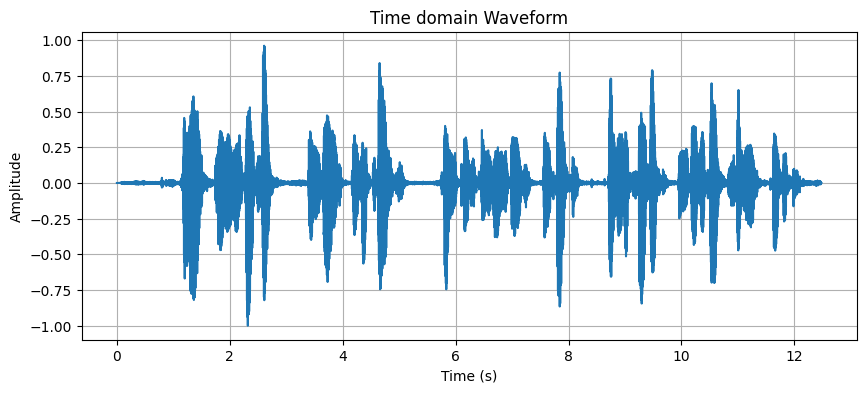

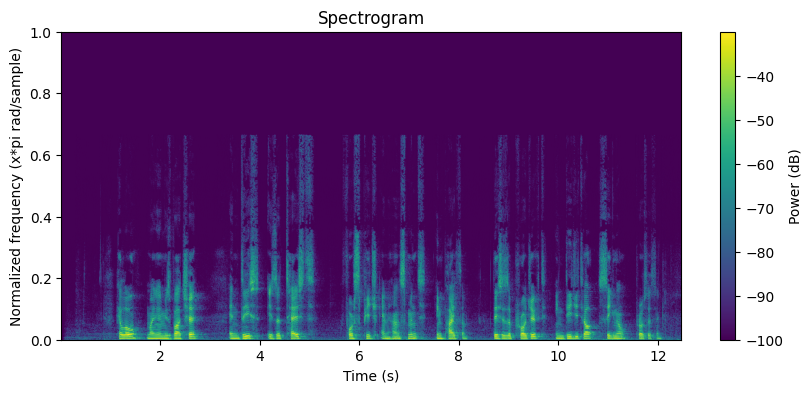

In [4]:
# Plotting signal in the time domain
plt.figure(figsize = (10,4))
plt.plot(t, speech / np.max(np.abs(speech))) # For plotting, I normalized waveform values (as often done in lab activities)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time domain Waveform")
plt.grid()

# Calculating and Plotting a spectrogram
f, t_spectrogram, Power = spectrogram(speech / np.max(np.abs(speech)), fs, window = 'hann', nfft = 1024, noverlap = 512, nperseg = 1024)
f_norm = f / ((fs)/2) # Normalized to nyquist frequency

plt.figure(figsize = (10,4))
plt.pcolormesh(t_spectrogram, f_norm, 10 * np.log10(Power + 1e-10), shading = 'gouraud') # Added a small number to avoid log(0)
plt.xlabel("Time (s)")
plt.ylabel("Normalized frequency (x*pi rad/sample)")
plt.ylim([0,1]) # Limited to 0-1 as we should for normalized frequency
plt.title("Spectrogram")
plt.colorbar(label = "Power (dB)")

In [5]:
# Adding noise to my original recording
noise = np.random.normal(0, 1, len(speech))

speech_noisy = speech + 0.005 * noise
speech_noisy = np.clip(speech_noisy, -1, 1) # Values above 1 or below -1 will get clipped and become either 1 or -1 respectively

sd.play(speech_noisy, fs)

-22.10570388179647


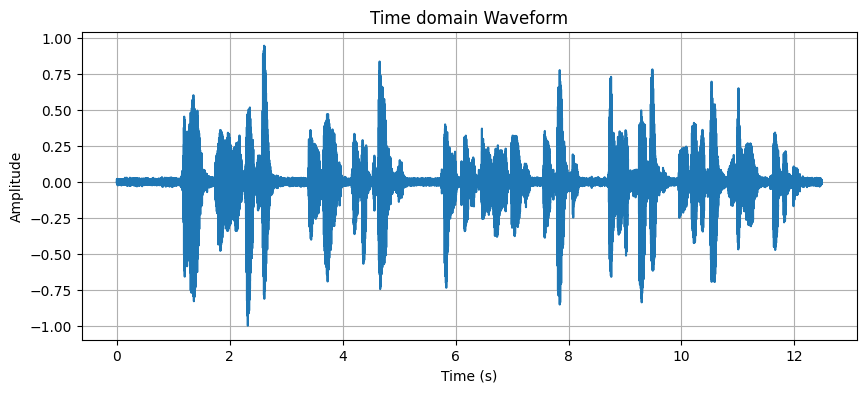

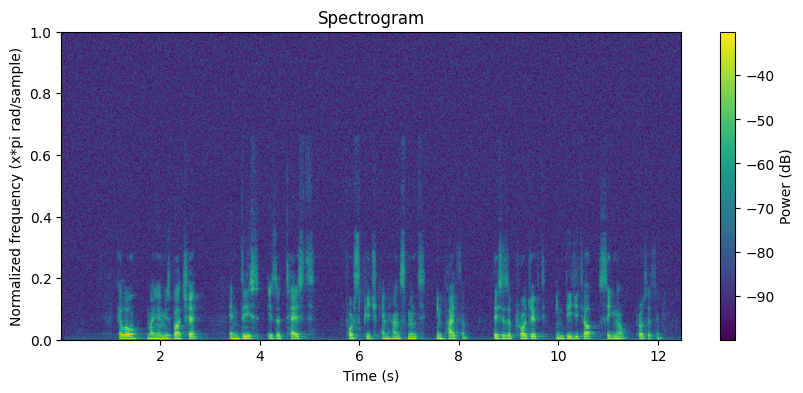

In [10]:
# Plotting the noisy signal in the time domain
plt.figure(figsize = (10,4))
plt.plot(t, speech_noisy / np.max(np.abs(speech_noisy))) # For plotting, I normalized waveform values (as often done in lab activities)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time domain Waveform")
plt.grid()

# Calculating and Plotting a spectrogram
f_noisy, t_spectrogram_noisy, Power_noisy = spectrogram(speech_noisy / np.max(np.abs(speech_noisy)), 
                                                                              fs, window = 'hann', nfft = 1024, noverlap = 512, nperseg = 1024)
f_norm_noisy = f_noisy / ((fs)/2) # Normalized to nyquist frequency

plt.figure(figsize = (10,4))
plt.pcolormesh(t_spectrogram_noisy, f_norm_noisy, 10 * np.log10(Power_noisy + 1e-10), shading = 'gouraud') # Added a small number to avoid log(0)
plt.xlabel("Time (s)")
plt.ylabel("Normalized frequency (x*pi rad/sample)")
plt.ylim([0,1]) # Limited to 0-1 as we should for normalized frequency
plt.title("Spectrogram")
plt.colorbar(label = "Power (dB)")

snr_value = calculate_snr(speech, noise)
print(snr_value)

# 1. Spectral Subtraction

26.536962814750925


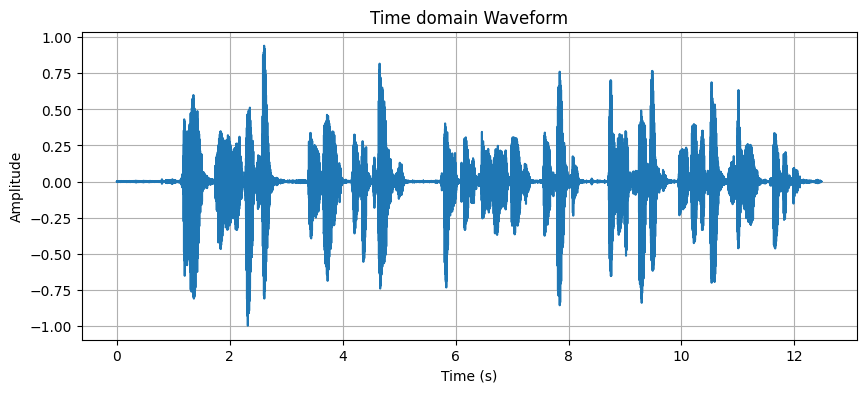

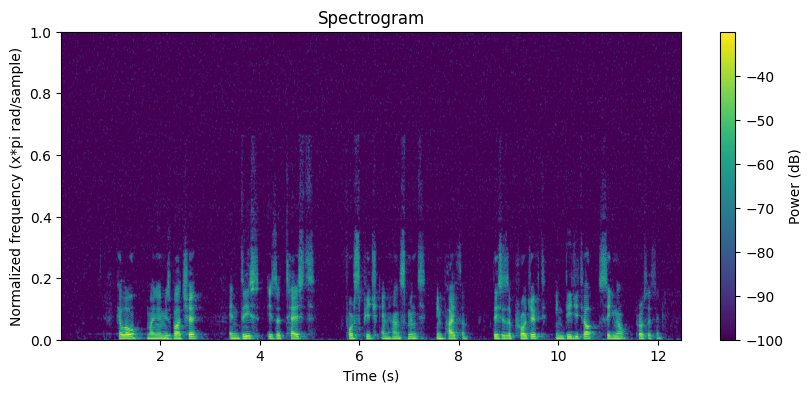

In [7]:
# Test and plot the recording after spectral subtraction
%run Spectral_subtraction.ipynb # Runs my Spectral_subtraction notebook, so we can use that function

speech_denoised = spectral_subtraction(speech_noisy, fs, 1.5)

sd.play(speech_denoised, fs)

# Plotting signal in the time domain
plt.figure(figsize = (10,4))
plt.plot(t, speech_denoised / np.max(np.abs(speech_denoised))) # For plotting, I normalized waveform values (as often done in lab activities)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time domain Waveform")
plt.grid()

# Calculating and Plotting a spectrogram
f, t_spectrogram, Power = spectrogram(speech_denoised / np.max(np.abs(speech_denoised)), fs,
                                      window = 'hann', nfft = 1024, noverlap = 512, nperseg = 1024)
f_norm = f / ((fs)/2) # Normalized to nyquist frequency

plt.figure(figsize = (10,4))
plt.pcolormesh(t_spectrogram, f_norm, 10 * np.log10(Power + 1e-10), shading = 'gouraud') # Added a small number to avoid log(0)
plt.xlabel("Time (s)")
plt.ylabel("Normalized frequency (x*pi rad/sample)")
plt.ylim([0,1]) # Limited to 0-1 as we should for normalized frequency
plt.title("Spectrogram")
plt.colorbar(label = "Power (dB)")

noiseForSNR = speech_denoised - speech

snr_value = calculate_snr(speech, noiseForSNR)
print(snr_value)

# 2. Wiener Filtering

27.857925483354357


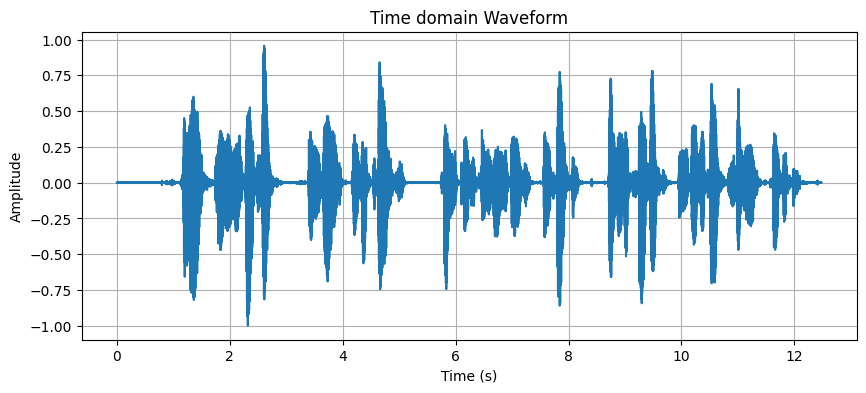

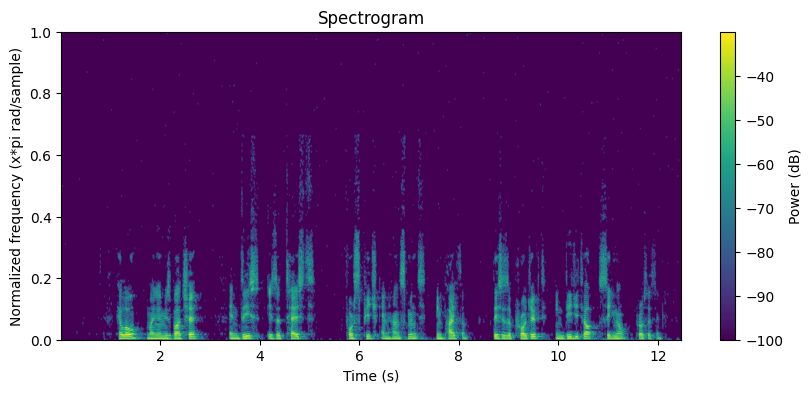

In [8]:
# Test and plot the recording after Wiener filtering
%run Wiener_filtering.ipynb # Runs my Wiener_filtering notebook, so we can use that function

speech_denoised = wiener_filtering(speech_noisy, fs, 5.5)

sd.play(speech_denoised, fs)

# Plotting signal in the time domain
plt.figure(figsize = (10,4))
plt.plot(t, speech_denoised / np.max(np.abs(speech_denoised))) # For plotting, I normalized waveform values (as often done in lab activities)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time domain Waveform")
plt.grid()

# Calculating and Plotting a spectrogram
f, t_spectrogram, Power = spectrogram(speech_denoised / np.max(np.abs(speech_denoised)), fs,
                                      window = 'hann', nfft = 1024, noverlap = 512, nperseg = 1024)
f_norm = f / ((fs)/2) # Normalized to nyquist frequency

plt.figure(figsize = (10,4))
plt.pcolormesh(t_spectrogram, f_norm, 10 * np.log10(Power + 1e-10), shading = 'gouraud') # Added a small number to avoid log(0)
plt.xlabel("Time (s)")
plt.ylabel("Normalized frequency (x*pi rad/sample)")
plt.ylim([0,1]) # Limited to 0-1 as we should for normalized frequency
plt.title("Spectrogram")
plt.colorbar(label = "Power (dB)")

noiseForSNR = speech_denoised - speech

snr_value = calculate_snr(speech, noiseForSNR)
print(snr_value)

# 3. Adaptive filtering

33.18911358475886


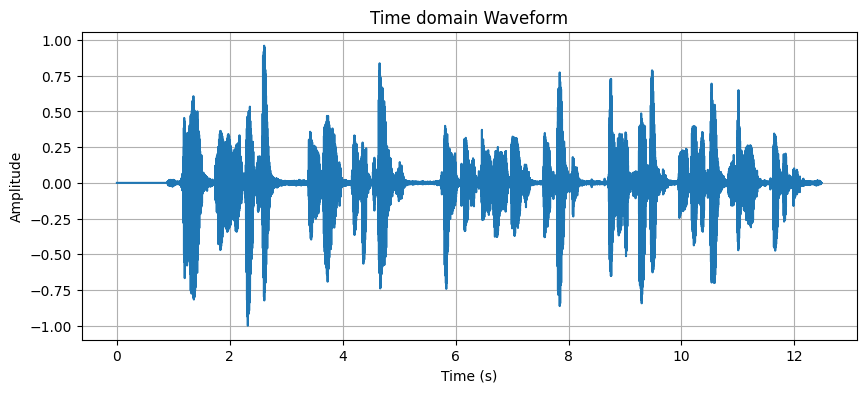

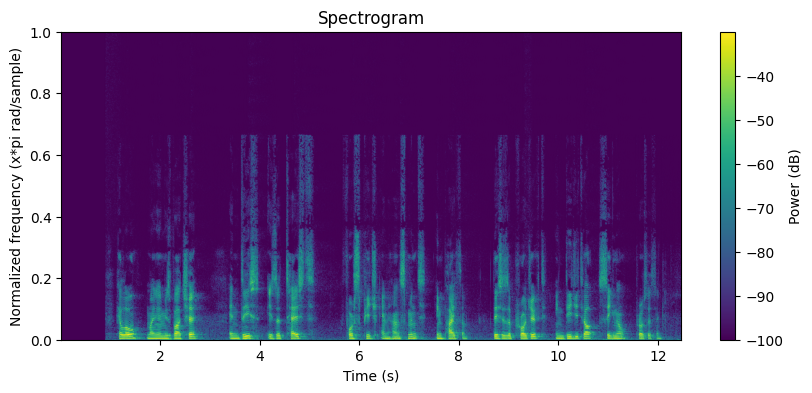

In [9]:
# Test and plot the recording after Adaptive filtering
%run Adaptive_Filtering.ipynb # Runs my Adaptive_filtering notebook, so we can use that function

speech_denoised = adaptive_filtering(speech_noisy, noise, 0.00004, 32)

speech_denoised[:int(0.9*fs)] = 0 # This is done to remove initial noise

sd.play(speech_denoised, fs)

# Plotting signal in the time domain
plt.figure(figsize = (10,4))
plt.plot(t, speech_denoised / np.max(np.abs(speech_denoised))) # For plotting, I normalized waveform values (as often done in lab activities)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time domain Waveform")
plt.grid()

# Calculating and Plotting a spectrogram
f, t_spectrogram, Power = spectrogram(speech_denoised / np.max(np.abs(speech_denoised)), fs,
                                      window = 'hann', nfft = 1024, noverlap = 512, nperseg = 1024)
f_norm = f / ((fs)/2) # Normalized to nyquist frequency

plt.figure(figsize = (10,4))
plt.pcolormesh(t_spectrogram, f_norm, 10 * np.log10(Power + 1e-10), shading = 'gouraud') # Added a small number to avoid log(0)
plt.xlabel("Time (s)")
plt.ylabel("Normalized frequency (x*pi rad/sample)")
plt.ylim([0,1]) # Limited to 0-1 as we should for normalized frequency
plt.title("Spectrogram")
plt.colorbar(label = "Power (dB)")

noiseForSNR = speech_denoised - speech

snr_value = calculate_snr(speech, noiseForSNR)
print(snr_value)